# PROYECTO FINAL: NullStorm

## 1. Definición del problema

Actualmente, es común que los estacionamientos utilicen accesos automatizados mediante reconocimiento de matrículas. Las empresas prefieren implementar barreras automáticas con cámaras en lugar de contratar vigilantes, debido a la reducción de costos y a la mejora en la eficiencia y rapidez de acceso. Sin embargo, estos sistemas suelen ser costosos y presentan limitaciones. Además, la información recopilada suele desaprovecharse, perdiendo oportunidades para optimizar la gestión y seguridad del estacionamiento.

### 1.1. Objetivos del proyecto

El objetivo de implementar un modelo de reconocimiento de matrículas es incrementar la seguridad del estacionamiento y reducir los costos de vigilancia. No obstante, en este proyecto queremos ir más allá y complementar el modelo de computer vision con un modelo LLM capaz de acceder al historial de entradas y salidas con el fin de ofrecer información relevante al usuario para un análisis de los datos correspondientes. En definitiva, los objetivos principales de este proyecto serán:

* Desarrollar un sistema de detección de matrículas que automatice el acceso a un estacionamiento de forma eficiente.

* Reducir los costos operativos mediante un sistema rápido y preciso.

* Recopilar los datos del flujo de vehículos y almacenarlos en una base de datos.

* Poder acceder a la base de datos y hacer consultas mediante lenguaje natural.

### 1.2. Claves del proyecto

Para lograr los objetivos marcados, será necesario marcar unos criterios de éxito que permitan cumplir las expectativas.

* Preprocesar las imágenes de entrada para facilitar su posterior detección.

* Usar un modelo de computer vision para la detección y reconocimiento del vehículo

* Usar un modelo de computer vision para la detección de la matrícula.

* Reconocimiento de texto con un modelo OCR.

* Filtrar los resultados para permitir únicamente letras en mayúsculas y números.

* Obtener una respuesta rápida y precisa.

* Almacenar los datos de una forma eficiente y de fácil acceso para el LLM.

* Diseñar un LLM capaz de recibir una consulta en lenguaje natural, acceder a los datos solicitados y realizar búsquedas con lenguaje SQL.

### 1.3. Arquitectura del modelo y flujo de trabajo

1. **Captura de la imagen o vídeo en tiempo real con una cámara IP.**

Las cámaras IP se caracterizan por su capacidad de conectarse a internet y transmitir la información, lo cual es necesario para los objetivos de nuestro proyecto.

2. **Detección de vehículos y matrículas con YOLO**

Los modelos YOLO (You Only Look Once) son redes neuronales convolucionales (CNNs) diseñadas para la detección de objetos en imágenes y vídeos en tiempo real.

Por ello, se utilizarán dos modelos YOLO para llevar a cabo el presente proyecto. El primero de ellos será un modelo especializado en detección de vehículos, mientras el segundo será un modelo especializado en detección de matrículas.

Estos modelos son capaces de reconocer las cajas delimitadoras y las clases de los objetos en una sola pasada sobre la imagen, lo cual permite un rápido funcionamiento del modelo.

3. **Preprocesamiento de imágenes con OpenCV**

OpenCV es una biblioteca de código abierto para procesamiento de imágenes y visión por computadora. Se caracteriza por su capacidad para procesar imágenes mediante filtros, transformaciones y detección de bordes, facilitando el posterior reconocimiento de los caracteres de las matrículas.

De esta forma, se aplicará la conversión a escala de grises, aumento de contraste, reducción de ruido, normalización, etc.

4. **Reconocimiento de caracteres con EasyOCR**

EasyOCR es una biblioteca de OCR (Reconocimiento Óptico de Caracteres) basada en PyTorch. Esta biblioteca permite extraer texto de imágenes con gran velocidad y efectividad.

5. **Base de datos EDW con BigQuery**

Un EDW (Enterprise Data Warehouse) en BigQuery es un almacén de datos empresarial en la nube de Google Cloud, diseñado para analizar y procesar grandes volúmenes de datos.

En el presente proyecto, se diseñará una base de datos de tipo EDW con BigQuery para almacenar las matrículas y demás datos.

6. **API REST para enviar la información a la base de datos**

Una API REST (Application Programming Interface - Representational State Transfer) es un tipo de interfaz que permite la comunicación entre sistemas a través del protocolo HTTP.

Por ello, se utilizará una API REST para enviar las matrículas reconocidas por el modelo junto con los datos complementarios a la base de datos.

7. **LLM para traducir lenguaje natural a SQL**

Se diseñará una LLM mediante Prompt Engineering con la capacidad de recibir una consulta del usuario en lenguaje natural, y el modelo traducirá a lenguaje SQL adecuado a la base de datos en cuestión.

8. **Cliente SQL en Google Colab.**

Se utilizará un cliente SQL en Google Collab con la finalidad de ejecutar la consulta en la base de datos de BigQuery y recibir un dataframe con los datos solicitados.

## 2. Recolección de datos

La recolección de datos se ha llevado a cabo a través de una empresa privada que nos ha facilitado casi 3.000 fotografías de vehículos con su respectiva matrícula en la entrada de un parking.

## 3. Preprocesamiento de datos

## 3.1. Limpieza del dataset

Para llevar a cabo el preprocesamiento de las imágenes, en primer lugar se eliminarán algunas imágenes no válidas para el proyecto:

* Imágenes donde la matrícula no aparece.

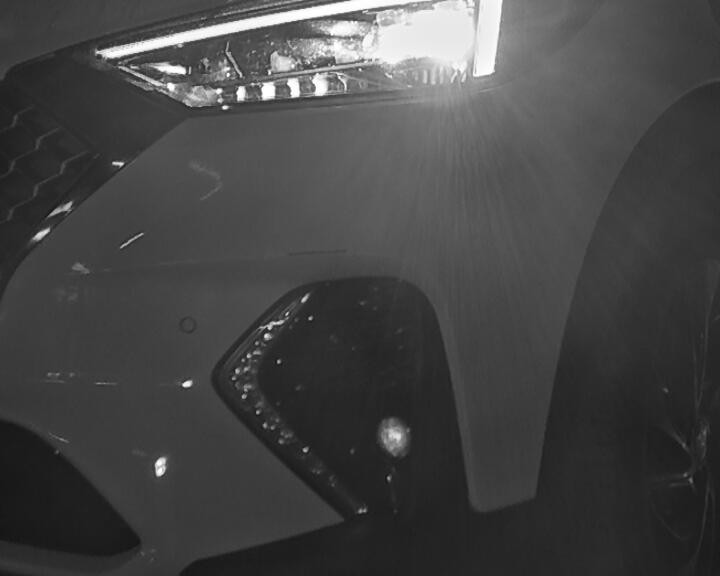

In [106]:
imagen = Image.open("E1,CAM1,250210085024198,---,0.jpg")
display(imagen)

* Imágenes donde la placa está recortada.

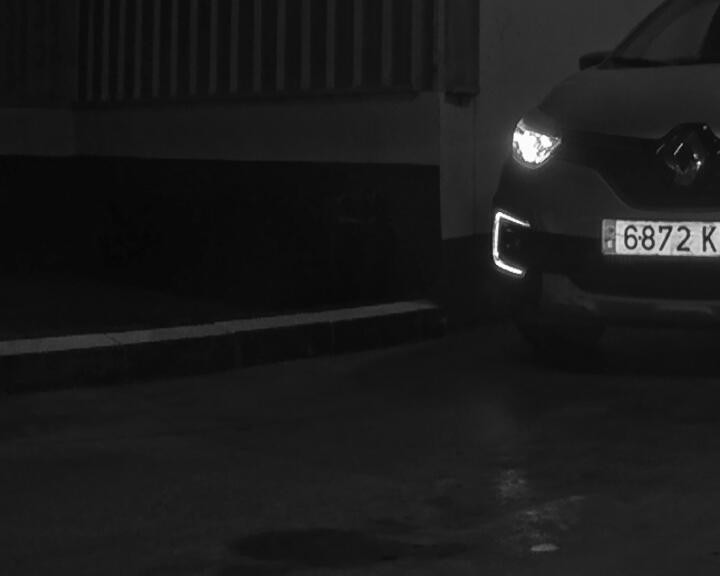

In [105]:
imagen = Image.open("E1,CAM1,250210071308221,---,9642.jpg")
display(imagen)

* Imágenes donde la matrícula apenas se puede leer.


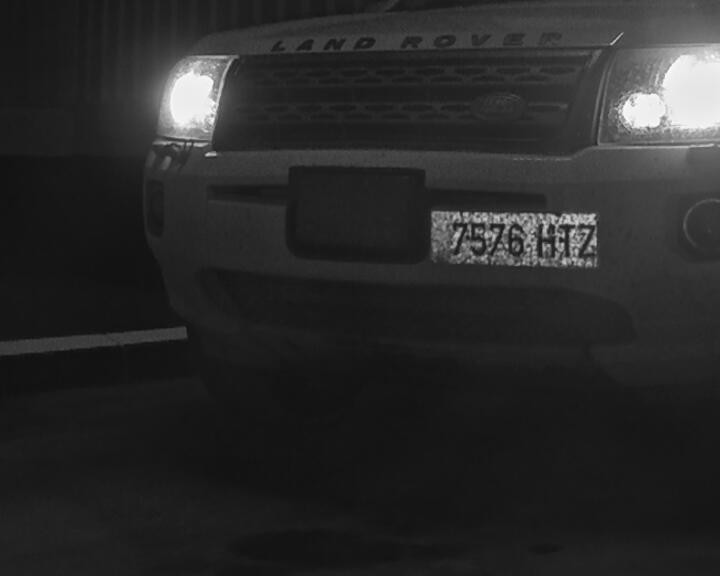

In [104]:
from IPython.display import display
from PIL import Image

imagen = Image.open("E1,CAM1,250210013813708,7576HTZ,8939.jpg")
display(imagen)

## 3.2. Mejora de las imágenes

En segundo lugar, se diseñarán diferentes funciones que lleven a cabo algunas modificaciones de las imágenes.

* Conversión a escala de grises

In [ ]:
def escala_grises(img):
    img_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_grises

* Mejora del contraste y reducción de ruido mediante ecualización del histograma, obteniendo una distribución unidorme en cuanto a la cantidad de píxeles de cada color.

In [ ]:
def mejorar_contraste(img):
    # Ecualizar el histograma para mejorar el contraste
    #ecualizada = cv2.equalizeHist(img)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img)

    return img_clahe

* Reducir el ruido con desenfoque Gaussiano

In [ ]:
def reducir_ruido(img):
  img_ruido = cv2.GaussianBlur(img, (5,5), 0)

  return img_ruido

* Detección de bordes

In [ ]:
def detect_bordes(img):
  img_bordes = cv2.Canny(img, 50, 150)

  return img_bordes

## 4. Análisis exploratorio de datos

Cargamos algunas de las imágenes del dataset obtenido para analizar los recursos de los que disponemos.

* Muchas de las imágenes son claras y de muy buena calidad.

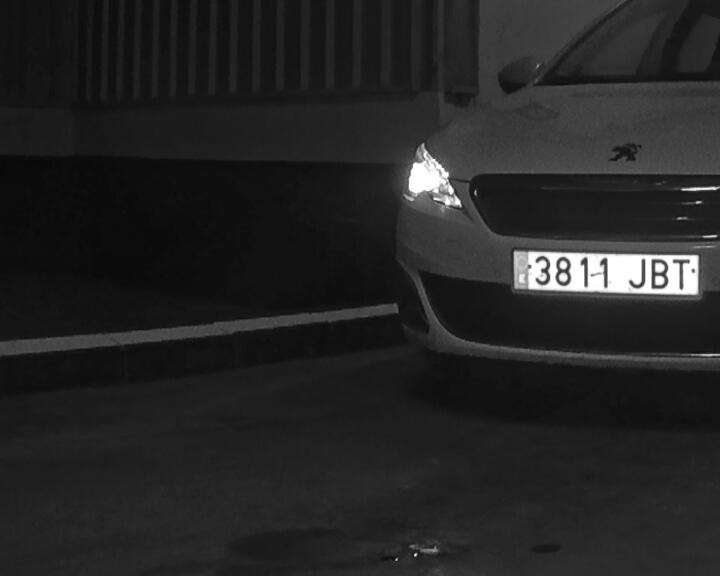

In [107]:
imagen = Image.open("E1,CAM1,250210002657228,3811JBT,9989.jpg")
display(imagen)

* Pero también encontramos una cantidad considerable de imágenes oscuras y más difíciles detectar.

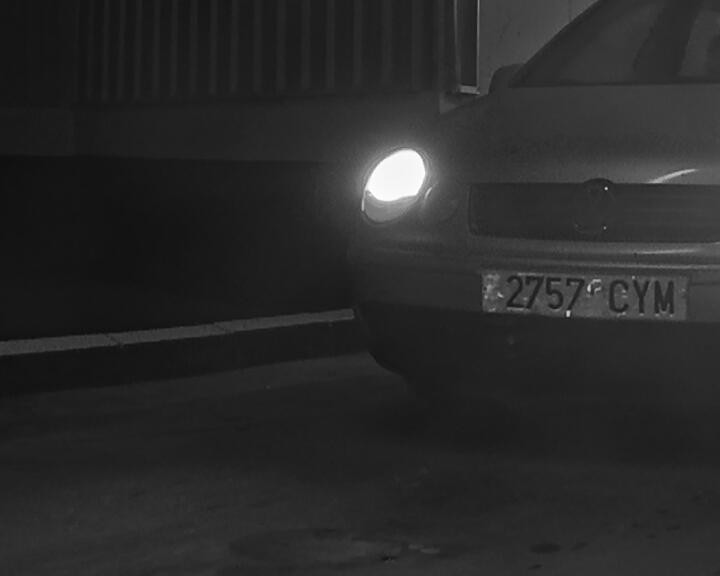

In [109]:
imagen = Image.open("E1,CAM1,250210093123570,2757CYM,9963.jpg")
display(imagen)

## 1. MODELO COMPUTER VISION

* Google Drive

In [ ]:
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

* Librerías necesarias

In [ ]:
pip install yolov5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.5 MB/s eta 0:00:00
  Crea

In [ ]:
from google.colab import files
from google.cloud import bigquery
import torch # Biblioteca para trabajar con modelos de aprendizaje profundo
import cv2 # Biblioteca para procesamiento de imágenes y video
import time # Para medir tiempos de ejecución
import re # Biblioteca para trabajar con expresiones regulares
import numpy as np # Biblioteca para cálculos numéricos
import easyocr # Biblioteca OCR para reconocimiento de texto
import os # Biblioteca para manejo de archivos y directorios
from IPython.display import Image, display # Para mostrar imágenes en Jupyter Notebook
import yolov5 # Biblioteca YOLOv5 para detección de objetos
import matplotlib.pyplot as plt
import re # Biblioteca Para trabajar con expresiones regulares
import random # Biblioteca Para generar datos aleatorios
from datetime import datetime, timedelta # Biblioteca Para trabajar con fechas y horas

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 1.1. Función para cargar la imagen

In [ ]:
def img_load(img_path=None):
    """Función para cargar una imagen."""
    if img_path is None: # Si no se proporciona una ruta, solicita al usuario que cargue una imagen
        print("Por favor, selecciona una imagen del vehículo:")
        uploaded = files.upload() # Carga el archivo
        image_path = next(iter(uploaded)) # Obtiene la ruta del archivo cargado
        frame = cv2.imread(image_path) # Lee la imagen
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convierte de BGR a RGB
        return frame
    else: # Si se proporciona una ruta, carga la imagen desde esa ruta
        frame = cv2.imread(img_path) # Lee la imagen
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convierte de BGR a RGB
        return frame


## 1.2. Preprocesamiento de la imagen

* Convertimos de nuevo la imagen a BGR

In [ ]:
def img_BGR(img):
    # Volvemos a convertir las imágenes en 3 dimensiones BGR
    img_preprocesada = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    return img_preprocesada

## 1.2. Detección de objetos con YOLOv5

* Se cargan los modelos YOLOv5 para detección de vehículos y YOLOv5 para detección de matrículas.

In [ ]:
vehicle_model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # Modelo YOLOv5 para detección de vehículos


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-3-1 Python-3.11.11 torch-2.5.1+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 129MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
plate_model = yolov5.load('keremberke/yolov5m-license-plate') # Modelo para detectar placas


config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/42.1M [00:00<?, ?B/s]

* Función para la detección de objetos

In [ ]:
def detectx(frame, model):
    """Función para detectar objetos en una imagen usando un modelo YOLOv5."""
    results = model(frame) # Realiza la detección
    detections = results.xyxy[0]  # Obtiene las coordenadas de las detecciones

    if len(detections) == 0:
        return None # Si no hay detecciones, retorna None

    height, width, _ = frame.shape # Obtiene las dimensiones de la imagen
    center_x, center_y = width / 2, height / 2  # Calcula el centro de la imagen

    # Inicializar variables para la mejor detección
    closest_detection = None
    closest_distance = float('inf')

    # Iterar sobre las detecciones
    for detection in detections.tolist():
        x1, y1, x2, y2, conf, cls = detection # Extrae información de la detección
        # Calcular el centro de la caja delimitadora
        box_center_x = (x1 + x2) / 2
        box_center_y = (y1 + y2) / 2
        # Calcular la distancia al centro de la imagen
        distance = ((box_center_x - center_x) ** 2 + (box_center_y - center_y) ** 2) ** 0.5
        # Guardar la detección más cercana al centro
        if distance < closest_distance:
            closest_distance = distance
            closest_detection = detection

    return closest_detection if closest_detection is not None else None

* Función para devolver las coordenadas del objeto drawDetectedDiamonds

In [ ]:
def coords(closest_detection):
    """Función para obtener las coordenadas de la detección más cercana."""
    if closest_detection is None:
        return None
    x1, y1, x2, y2, conf, cls = closest_detection # Extrae información de la detección

    # Filtrar por confianza
    if conf >= 0.55: # Si la confianza es mayor o igual a 0.55
      coords = [int(x1), int(y1), int(x2), int(y2)] # Retorna las coordenadas como enteros
      return coords

    return None

## 1.3. Funciones para limpiar el texto

* Se crea una función para filtrar el texto reconocido comprobando que sólo tiene letras y números.

In [ ]:
def filter_plate_text(plate_text):
    """Función para filtrar el texto de la placa, dejando solo letras y números."""
    if isinstance(plate_text, list):
        plate_text = ''.join(plate_text) # Si es una lista, la convierte a string
    return re.sub(r'[^A-Za-z0-9]', '', plate_text) # Elimina caracteres que no sean letras o números

* Se crea otra función para filtrar el texto basado en el tamaño de la región.

In [ ]:
def filter_text(region, ocr_result, region_threshold):
    """Función para filtrar el texto reconocido por OCR basado en el tamaño de la región."""
    rectangle_size = region.shape[0]*region.shape[1] # Calcula el tamaño de la región
    plate = []
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0])) # Calcula la longitud del texto
        height = np.sum(np.subtract(result[0][2], result[0][1])) # Calcula la altura del texto
        if length*height / rectangle_size > region_threshold: # Si el área del texto es mayor que el umbral
            plate.append(result[1]) # Añade el texto a la lista
    return plate


## 1.4. Reconocimiento de texto con EasyOCR

In [ ]:
def recognize_plate_easyocr(img, coords, reader, region_threshold):
    """Función para reconocer el texto de la placa usando EasyOCR."""
    xmin, ymin, xmax, ymax = coords
    nplate = img[int(ymin):int(ymax), int(xmin):int(xmax)] # Recorta la región de la placa
    ocr_result = reader.readtext(nplate) # Realiza OCR en la región
    text = filter_text(region=nplate, ocr_result=ocr_result, region_threshold=region_threshold) # Filtra el texto
    if len(text) == 1:
        text = text[0].upper() # Si solo hay un texto, lo convierte a mayúsculas
    return text


## 1.5. Extracción de la información del vehículo

In [ ]:
def vehicle_info(frame, vehicle_detection, plate_detection):
    """Función para extraer información del vehículo y la placa."""
    vehicle_classes = ['car', 'motorcycle']  # Clases de vehículos que queremos detectar
    extracted_info = {}  # Diccionario para almacenar información extraída
    translation_dict = {'car': 'carro', 'motorcycle': 'motocicleta'}  # Diccionario para traducir al español
    type_dict = {'car': '1', 'motorcycle': '2'}  # Diccionario para asignar un tipo numérico a cada clase

    def translate_vehicle_class(cls_name):
        """Función interna para traducir el nombre de la clase del vehículo."""
        return translation_dict.get(cls_name, cls_name)

    if vehicle_detection:  # Verifica si se detectó un vehículo
        x1, y1, x2, y2, conf, cls = vehicle_detection  # Extrae información de la detección
        if conf >= 0.55 and vehicle_model.names[int(cls)] in vehicle_classes:  # Si la confianza es alta y la clase es válida
            vehicle_name = translate_vehicle_class(vehicle_model.names[int(cls)])  # Traduce el nombre del vehículo
            vehicle_type = type_dict[vehicle_model.names[int(cls)]]  # Obtiene el tipo numérico del vehículo
            extracted_info["vehicle_name"] = vehicle_name  # Almacena el nombre del vehículo en el diccionario
            extracted_info["vehicle_type"] = vehicle_type  # Almacena el tipo numérico en el diccionario

    if plate_detection:  # Verifica si se detectó una placa
        x1, y1, x2, y2, conf, cls = plate_detection  # Extrae información de la detección
        if conf >= 0.55:  # Si la confianza es alta
            coords = [int(x1), int(y1), int(x2), int(y2)]  # Obtiene las coordenadas de la placa
            plate_num = recognize_plate_easyocr(img=frame, coords=coords, reader=EASY_OCR, region_threshold=OCR_TH)  # Realiza OCR en la región de la placa
            plate_num = filter_plate_text(plate_num)  # Filtra el texto de la placa
            extracted_info["plate"] = plate_num  # Almacena el número de placa en el diccionario

    return extracted_info

## 1.6. Generar fecha ficticia para entrada y salida del vehículo

In [ ]:
def generar_fecha_hora():
    """Función para generar una fecha y hora actual."""
    return datetime.now()


## 1.7. Generar datos aleatorios para cada matrícula

In [ ]:
def generar_datos_random(matricula, vehicle_type=None, vehicle_name=None):
    """
    Función para generar datos aleatorios para un vehículo.

    Args:
    matricula (str): Número de matrícula detectado.
    vehicle_type (str): Tipo de vehículo detectado ('1' para coche, '2' para motocicleta).

    Returns:
    dict: Información generada aleatoriamente para el vehículo.
    """
    marcas_modelos = {  # Diccionario de marcas y sus modelos correspondientes
        "Toyota": ["Supra", "Celica", "Yaris"],
        "Ford": ["GT", "Focus", "Mustang"],
        "Honda": ["NSX", "Civic", "CR-V"],
        "Nissan": ["GTR", "350z", "240sx"],
        "Audi": ["RS7", "R8", "S5"],
        "BMW": ["330e", "M4", "i8"],
        "Mercedes": ["C63S", "GT", "A45"],
        "Tesla": ["3", "Y", "X"],
        "Porsche": ["911", "Cayman", "Taycan"],
    }
    colores = ["Rojo", "Azul", "Negro", "Blanco", "Gris", "Amarillo", "Verde"]  # Lista de colores posibles
    tarifas = ["tarifa_001", "tarifa_002", "tarifa_005"]  # Lista de tarifas posibles
    parking_camaras = {  # Diccionario de parkings y sus cámaras correspondientes
        "parking_001": ("camara_in_001", "camara_out_001"),
        "parking_002": ("camara_in_002", "camara_out_002"),
        "parking_005": ("camara_in_005", "camara_out_005"),
    }

    fecha_entrada = generar_fecha_hora()  # Genera una fecha y hora de entrada
    parking_id = random.choice(list(parking_camaras.keys()))  # Elige un parking aleatorio
    camara_in_id, camara_out_id = parking_camaras[parking_id]  # Obtiene las cámaras del parking
    camara_seleccionada = {"camara_in_id": "", "camara_out_id": ""}
    if random.choice([True, False]):  # Elige aleatoriamente entre cámara de entrada o salida
        camara_seleccionada["camara_in_id"] = camara_in_id
    else:
        camara_seleccionada["camara_out_id"] = camara_out_id

    marca = random.choice(list(marcas_modelos.keys()))  # Elige una marca aleatoria
    modelo = random.choice(marcas_modelos[marca])  # Elige un modelo aleatorio de la marca
    color = random.choice(colores)  # Elige un color aleatorio
    tarifa_id = random.choice(tarifas)  # Elige una tarifa aleatoria

    # Manejo del tipo de vehículo y su nombre
    if vehicle_type is None or vehicle_type not in ["1", "2"]:
        print("Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).")
        tipo_vehiculo_id = "1"
        tipo_vehiculo_nombre = "carro"
    else:
        tipo_vehiculo_id = vehicle_type
        tipo_vehiculo_nombre = vehicle_name

    car_info = {
        "matricula_id": matricula,
        "parking_id": parking_id,
        "fecha_registro_dt": fecha_entrada.strftime("%Y-%m-%d %H:%M:%S"),
        "tarifa_id": tarifa_id,
        "marca_ds": marca,
        "modelo_ds": modelo,
        "color_ds": color,
        "tipo_vehiculo_id": tipo_vehiculo_id,
        "tipo_vehiculo_nombre": tipo_vehiculo_nombre,
        **camara_seleccionada
    }
    return car_info

## 1.8. Insertar los datos de la matrícula en la base de datos

In [ ]:
def insertar_matricula(car_info):
    """Función para insertar datos en BigQuery."""
    client = bigquery.Client() # Crea un cliente de BigQuery
    table_id = "aiparking-451016.00_aiparking.accesos" # ID de la tabla en BigQuery
    fila = {
        "matricula_id": car_info["matricula_id"],
        "parking_id": car_info["parking_id"],
        "fecha_registro_dt": car_info["fecha_registro_dt"],
        "camara_in_id": car_info["camara_in_id"],
        "camara_out_id": car_info["camara_out_id"],
        "tarifa_id": car_info["tarifa_id"],
        "marca_ds": car_info["marca_ds"],
        "modelo_ds": car_info["modelo_ds"],
        "color_ds": car_info["color_ds"],
        "tipo_vehiculo_id": car_info["tipo_vehiculo_id"],
        "tipo_vehiculo_nombre": car_info["tipo_vehiculo_nombre"]
    }

    # Insertar la fila
    errores = client.insert_rows_json(table_id, [fila])

    if errores == []:
        print("Matrícula insertada correctamente.")
    else:
        print("Errores al insertar:", errores)

## 1.9. PIPELINE COMPUTER VISION MODEL

In [ ]:
EASY_OCR = easyocr.Reader(['en']) # Inicializar EasyOCR para idioma inglés
OCR_TH = 0.2 # Umbral de confianza para el OCR

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [118]:
def main_CV(img_path=None):
    """Función principal que orquesta todo el proceso de detección y procesamiento."""

    # Carga imagen desde ruta proporcionada o cargada por usuario
    img = img_load(img_path)
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen: {img_path}")
    frame = img
    # Preprocesamiento de la imagen
    img_gris = escala_grises(img)
    #img_contraste = mejorar_contraste(img_gris)
    #img_ruido = reducir_ruido(img_contraste)
    #img_bordes = detect_bordes(img_gris)

    # Conversión de escala de grises a RGB
    #frame = img_BGR(img_contraste)
    frame = img
    # Detecta vehículos usando YOLOv5
    vehicle_detection = detectx(frame, model=vehicle_model)
    print("Detección de vehículo:", vehicle_detection)

    # Detecta placas usando YOLOv5
    plate_detection = detectx(frame, model=plate_model)
    print("Detección de placa:", plate_detection)

    # Extrae información sobre vehículos y placas
    plate_info = vehicle_info(frame, vehicle_detection, plate_detection)

    # Verifica si hay información sobre placas
    if 'plate' in plate_info:
        vehicle_type = plate_info.get('vehicle_type')  # Obtiene el tipo de vehículo si existe
        vehicle_name = plate_info.get('vehicle_name')  # Obtiene el nombre del vehículo si existe

        if vehicle_type:
            print(f"Vehículo detectado: {vehicle_name}, tipo de vehículo {vehicle_type}")
        else:
            print("No se detectó el tipo de vehículo. Se usarán valores por defecto.")

        info = generar_datos_random(plate_info['plate'], vehicle_type, vehicle_name)  # Genera datos aleatorios usando la matrícula y el tipo de vehículo

        insertar_matricula(info)  # Inserción en BigQuery

        return info  # Devuelve la información generada
    else:
        print("No se detectó placa.")
        return None  # Retorna None si no se detectó placa

In [ ]:
info = main_CV()


Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250212045332569,7576HTZ,9710.jpg to S1,CAM2,250212045332569,7576HTZ,9710 (9).jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [501.0532531738281, 117.82525634765625, 634.6022338867188, 175.05804443359375, 0.8674851655960083, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


In [ ]:
print(info) # Imprime la información resultante

{'matricula_id': '7576HTZ', 'parking_id': 'parking_001', 'fecha_registro_dt': '2025-03-01 19:02:30', 'tarifa_id': 'tarifa_001', 'marca_ds': 'Mercedes', 'modelo_ds': 'GT', 'color_ds': 'Verde', 'tipo_vehiculo_id': '1', 'tipo_vehiculo_nombre': 'carro', 'camara_in_id': 'camara_in_001', 'camara_out_id': ''}


## 1.10. EVALUACIÓN DEL MODELO

In [ ]:
import os

# Ruta de la carpeta con imágenes
ruta_imagenes = '/content/drive/MyDrive/PROYECTO/Matriculas'

In [112]:
def evaluar(img_path):
      matriculas_predichas = []
      matriculas_reales = []
      contador_imagenes = 0

      for archivo in os.listdir(img_path):
          contador_imagenes += 1
          if archivo.endswith('.jpg') and contador_imagenes < 100:
              imagen_path = os.path.join(img_path, archivo)

              # Predicción de matrícula
              resultado = main_CV(imagen_path)

              # Extraer matrícula real del nombre del archivo
              matricula_real = archivo.split(',')[3]
              matriculas_reales.append(matricula_real)

              if resultado is not None:
                  matriculas_predichas.append(resultado.get('matricula_id', 'NoDetectada'))
              else:
                  matriculas_predichas.append('NoDetectada')
      # Calcula precisión
      from sklearn.metrics import accuracy_score

      precision = accuracy_score(matriculas_reales, matriculas_predichas)
      print(f'Precisión del modelo: {precision * 100:.2f}%')

* EVALUACIÓN SIN PREPROCESAMIENTO

In [119]:
evaluacion_0 = evaluar(ruta_imagenes)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [199.44064331054688, 164.34576416015625, 381.68768310546875, 213.36436462402344, 0.8335041999816895, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 0.2738685607910156, 464.8872985839844, 336.1223449707031, 0.5289663672447205, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [125.75917053222656, 173.87484741210938, 313.30828857421875, 224.97634887695312, 0.8174146413803101, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.8409118652344, 184.92288208007812, 664.655517578125, 242.13807678222656, 0.8437589406967163, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [189.42503356933594, 162.01177978515625, 363.75299072265625, 209.77992248535156, 0.7187391519546509, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [459.6491394042969, 241.4903106689453, 696.3689575195312, 307.678955078125, 0.8510066270828247, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [245.5948486328125, 293.7254638671875, 524.7947387695312, 380.77801513671875, 0.8687108755111694, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [517.986328125, 232.37596130371094, 699.8345336914062, 286.2569885253906, 0.841206967830658, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [381.4053955078125, 243.22451782226562, 637.0858154296875, 320.1510009765625, 0.8413958549499512, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [144.08091735839844, 252.79791259765625, 388.825439453125, 338.1435546875, 0.8825103044509888, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [150.7714080810547, 176.53973388671875, 340.511962890625, 225.798583984375, 0.8368558287620544, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [396.9708557128906, 179.0517120361328, 465.3532409667969, 236.5116424560547, 0.3034486472606659, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.01910400390625, 268.6457824707031, 705.4795532226562, 337.4359436035156, 0.8749595284461975, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [189.78128051757812, 163.52708435058594, 373.1368408203125, 216.2427520751953, 0.8395352959632874, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [445.4530334472656, 336.78546142578125, 705.0006103515625, 407.89324951171875, 0.8565800786018372, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [505.1104431152344, 236.0922393798828, 700.036865234375, 292.3228454589844, 0.8668267130851746, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [486.23309326171875, 228.21945190429688, 700.1790161132812, 289.23052978515625, 0.8514848947525024, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [488.9556579589844, 260.95751953125, 686.842529296875, 324.4820556640625, 0.8480643033981323, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [301.86248779296875, 210.87049865722656, 504.7577209472656, 268.849609375, 0.8502180576324463, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [402.2470397949219, 3.0511951446533203, 720.0, 375.8516845703125, 0.25237274169921875, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [506.851806640625, 246.47769165039062, 693.501953125, 299.12310791015625, 0.858915388584137, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [505.3714294433594, 21.688419342041016, 718.9575805664062, 351.9682922363281, 0.5578336119651794, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [621.6256103515625, 240.86195373535156, 718.607421875, 285.613525390625, 0.8672708868980408, 0.0]
Vehículo detectado: carro, tipo de vehículo 1
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [212.84365844726562, 142.9283447265625, 388.08197021484375, 193.51731872558594, 0.828129231929779, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [470.97125244140625, 254.73753356933594, 669.4943237304688, 312.56683349609375, 0.8425856828689575, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [334.1199035644531, 23.60764503479004, 719.4977416992188, 422.61773681640625, 0.33905303478240967, 12.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [460.5834045410156, 270.8316955566406, 686.5201416015625, 339.65863037109375, 0.8552239537239075, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [63.14553451538086, 138.46693420410156, 258.8301696777344, 191.32138061523438, 0.8410738110542297, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [452.96405029296875, 372.3977355957031, 708.8935546875, 441.5465087890625, 0.8520150780677795, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [473.45068359375, 306.2293395996094, 642.6799926757812, 376.8545227050781, 0.8692451119422913, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [458.14886474609375, 266.94873046875, 695.072265625, 336.3902893066406, 0.8650687336921692, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [78.5728988647461, 231.61050415039062, 262.2580871582031, 283.66448974609375, 0.8512603640556335, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [97.26226043701172, 172.46926879882812, 280.0431823730469, 224.6751708984375, 0.845903217792511, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [2.95916748046875, 4.289096832275391, 451.0904541015625, 320.4827575683594, 0.3557089865207672, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [104.35531616210938, 172.17893981933594, 282.8335266113281, 219.20028686523438, 0.8319646120071411, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [465.59393310546875, 281.3762512207031, 707.1566162109375, 349.6366882324219, 0.7586278319358826, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [160.60777282714844, 315.2995910644531, 454.1478271484375, 409.4096984863281, 0.864121675491333, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [467.8613586425781, 331.1791076660156, 698.1240844726562, 398.4482116699219, 0.8576647043228149, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [472.80865478515625, 231.28468322753906, 704.3058471679688, 296.8323059082031, 0.8745761513710022, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [443.4661560058594, 242.1060028076172, 686.8541259765625, 316.2489929199219, 0.8616455793380737, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [462.5043640136719, 230.8208465576172, 677.0703735351562, 294.4766540527344, 0.8733510971069336, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [159.8110809326172, 150.14105224609375, 334.3860168457031, 200.94161987304688, 0.8515928387641907, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [441.3283386230469, 249.28285217285156, 679.9696655273438, 316.32464599609375, 0.8783769607543945, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [100.6540756225586, 125.49485778808594, 279.6036376953125, 174.75436401367188, 0.8343350887298584, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [499.5881042480469, 233.65402221679688, 680.2055053710938, 288.55810546875, 0.8508115410804749, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [356.8924560546875, 331.74420166015625, 667.6672973632812, 417.9080505371094, 0.8696972131729126, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [180.26419067382812, 158.16531372070312, 377.6383056640625, 210.03652954101562, 0.8501858115196228, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [352.8641662597656, 18.298999786376953, 718.4324340820312, 383.6222839355469, 0.3264521062374115, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [475.071044921875, 232.7362823486328, 698.294921875, 297.474365234375, 0.873097836971283, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [121.69725799560547, 327.8130798339844, 424.8174743652344, 425.5030822753906, 0.8679473400115967, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [441.2920837402344, 252.15878295898438, 683.0648803710938, 324.9628601074219, 0.8743784427642822, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [67.36959075927734, 314.49359130859375, 361.689697265625, 416.6952209472656, 0.8345817923545837, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [93.78209686279297, 249.2239990234375, 313.1885681152344, 327.49822998046875, 0.8860124349594116, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [103.10774230957031, 145.89044189453125, 288.3125305175781, 199.6022186279297, 0.8530184626579285, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [213.3390655517578, 162.15213012695312, 392.74102783203125, 214.0389404296875, 0.8410994410514832, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [208.5784912109375, 116.58450317382812, 242.23919677734375, 161.2047576904297, 0.25367870926856995, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [132.5218048095703, 166.8801727294922, 328.13140869140625, 222.19174194335938, 0.8412326574325562, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [459.4130859375, 216.37515258789062, 679.1329956054688, 283.7168273925781, 0.8464832901954651, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [95.51988983154297, 345.9648742675781, 409.19683837890625, 444.7304992675781, 0.5653895139694214, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [227.5216827392578, 271.0739440917969, 485.5652160644531, 357.9622802734375, 0.8497675657272339, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [390.34088134765625, 238.71563720703125, 636.2601928710938, 314.5056457519531, 0.834169328212738, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [145.88552856445312, 171.77975463867188, 336.7955017089844, 222.0303955078125, 0.8299564123153687, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [413.02105712890625, 302.42425537109375, 675.865966796875, 376.2547302246094, 0.868686318397522, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [108.50460815429688, 141.40382385253906, 298.8545227050781, 194.02212524414062, 0.8545000553131104, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [472.7798156738281, 224.5839385986328, 686.1150512695312, 286.63232421875, 0.8431417346000671, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [169.35202026367188, 223.4447479248047, 343.6415710449219, 271.5312194824219, 0.8199688196182251, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [395.7416076660156, 267.9717102050781, 614.240478515625, 335.31976318359375, 0.8634319305419922, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [208.427734375, 162.0225830078125, 386.52593994140625, 213.6806182861328, 0.852587103843689, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [86.38421630859375, 146.85841369628906, 292.76531982421875, 207.67698669433594, 0.8508793115615845, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [239.9632110595703, 177.43316650390625, 465.80853271484375, 235.78408813476562, 0.871360182762146, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [325.4938659667969, 198.184326171875, 537.0827026367188, 253.5330047607422, 0.8571953177452087, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [277.8922119140625, 282.8644104003906, 524.3097534179688, 359.0007629394531, 0.851284921169281, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [518.8734130859375, 248.17083740234375, 694.4157104492188, 300.9660949707031, 0.8394575715065002, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [448.3175354003906, 195.52313232421875, 664.9796142578125, 255.05560302734375, 0.8439667224884033, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [386.88751220703125, 196.22918701171875, 629.2950439453125, 261.9615783691406, 0.8424855470657349, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [390.5582580566406, 215.95689392089844, 592.2000732421875, 282.2458801269531, 0.8557366728782654, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [290.4120788574219, 180.2236328125, 576.8639526367188, 254.1776580810547, 0.8329135775566101, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [398.2744140625, 216.39710998535156, 632.1598510742188, 285.35345458984375, 0.8766096830368042, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [456.96502685546875, 342.9026184082031, 705.228271484375, 421.088623046875, 0.8385888338088989, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [267.2926940917969, 95.5538101196289, 350.8584899902344, 201.50393676757812, 0.26126813888549805, 9.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [396.2650146484375, 238.7561798095703, 638.2083740234375, 308.9726257324219, 0.8650923371315002, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [311.2559509277344, 82.53681182861328, 413.2579650878906, 150.71600341796875, 0.3836972117424011, 9.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [30.002777099609375, 196.8374786376953, 238.26901245117188, 255.99081420898438, 0.8523969054222107, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.90411376953125, 241.33425903320312, 700.47607421875, 309.91552734375, 0.8820613622665405, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [453.1266174316406, 265.0003356933594, 696.4873046875, 335.3192138671875, 0.8646856546401978, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [444.1139221191406, 224.2495880126953, 655.1791381835938, 285.0579528808594, 0.8603447079658508, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [403.6272277832031, 318.6661376953125, 679.6210327148438, 397.666015625, 0.8070152997970581, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [6.221626281738281, 0.0, 443.4523620605469, 322.7187194824219, 0.2533358931541443, 5.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [121.40558624267578, 163.29635620117188, 292.52288818359375, 210.83546447753906, 0.8415859341621399, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [496.71453857421875, 235.95489501953125, 678.58837890625, 290.1534423828125, 0.8530387878417969, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [341.97808837890625, 137.335693359375, 403.08294677734375, 226.9232940673828, 0.34246665239334106, 9.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [473.8255310058594, 243.4075469970703, 695.6708984375, 310.9700622558594, 0.8602052927017212, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [151.41944885253906, 167.34559631347656, 372.6240539550781, 230.3691864013672, 0.8709002733230591, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [291.0171203613281, 247.0240478515625, 537.9060668945312, 326.59930419921875, 0.8910887241363525, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [161.42337036132812, 177.36282348632812, 362.0426940917969, 230.5736541748047, 0.8034866452217102, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [400.3277282714844, 227.79808044433594, 633.0585327148438, 296.5067443847656, 0.8715550899505615, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [179.179931640625, 134.63818359375, 375.46392822265625, 188.24664306640625, 0.8397588133811951, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [158.2244415283203, 162.42572021484375, 352.0325622558594, 216.6715087890625, 0.8390806913375854, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 3.8622264862060547, 423.3991394042969, 325.8533935546875, 0.3396173417568207, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [80.27648162841797, 160.58949279785156, 245.9759521484375, 205.901611328125, 0.8336961269378662, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [148.782958984375, 146.28533935546875, 322.9048767089844, 197.65814208984375, 0.8447818160057068, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [74.53144073486328, 2.6301236152648926, 113.5505142211914, 31.318262100219727, 0.27347561717033386, 33.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [347.0345764160156, 267.74981689453125, 555.8458862304688, 323.3215637207031, 0.8411373496055603, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [163.7719268798828, 138.7476806640625, 344.2300109863281, 185.8245849609375, 0.8026482462882996, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [129.12347412109375, 160.89535522460938, 307.9456481933594, 210.2251739501953, 0.832252562046051, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [220.5704345703125, 180.24810791015625, 411.85101318359375, 233.91448974609375, 0.855101466178894, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [454.92596435546875, 228.55714416503906, 698.1685180664062, 295.67303466796875, 0.855246365070343, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [299.6583557128906, 98.10397338867188, 512.7098999023438, 153.23924255371094, 0.8564773201942444, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [367.0081481933594, 235.6465301513672, 597.031005859375, 299.4103698730469, 0.8684358596801758, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [61.374839782714844, 145.1214599609375, 238.28024291992188, 196.67991638183594, 0.8473777174949646, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [445.19732666015625, 229.7176971435547, 694.8089599609375, 303.4206237792969, 0.8731551170349121, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [81.91289520263672, 302.0094299316406, 329.66644287109375, 396.23065185546875, 0.8747848272323608, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 10.32828140258789, 511.2119445800781, 332.2033996582031, 0.4721338450908661, 4.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [107.87059020996094, 245.60975646972656, 326.2819519042969, 307.78302001953125, 0.8585273027420044, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]
Precisión del modelo: 40.40%


* EVALUACIÓN CON ESCALA DE GRISES Y CONTRASTE

In [117]:
evaluacion_1 = evaluar(ruta_imagenes)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [199.8050537109375, 164.38079833984375, 382.18524169921875, 213.8426971435547, 0.8266383409500122, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.7895393371582031, 0.0, 462.88934326171875, 336.1424255371094, 0.4001876413822174, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [125.60064697265625, 174.78512573242188, 314.3173828125, 225.32530212402344, 0.8153008222579956, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.1440734863281, 183.8177032470703, 666.1759643554688, 243.00482177734375, 0.8528885841369629, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [190.1027374267578, 160.8342742919922, 365.5625, 211.51963806152344, 0.8139398097991943, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [460.05914306640625, 241.7854461669922, 696.6953125, 308.7992248535156, 0.8456153273582458, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [246.10292053222656, 293.62451171875, 524.955810546875, 382.17822265625, 0.866779625415802, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [518.3965454101562, 232.1012725830078, 700.2506103515625, 287.0197448730469, 0.8326925039291382, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [381.13720703125, 242.5500030517578, 637.0806884765625, 320.60736083984375, 0.8441242575645447, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [143.7447967529297, 253.0736846923828, 389.3283996582031, 339.2440185546875, 0.8835331201553345, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [152.46878051757812, 175.00833129882812, 337.860595703125, 226.34877014160156, 0.8347871899604797, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.25762939453125, 268.3041687011719, 706.3847045898438, 338.83819580078125, 0.8729202747344971, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [188.9384002685547, 163.33883666992188, 373.26177978515625, 215.92918395996094, 0.8419086337089539, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [444.6477355957031, 336.750244140625, 706.3267822265625, 409.01727294921875, 0.8593575358390808, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [369.6731262207031, 149.97030639648438, 716.2998046875, 401.9015197753906, 0.2688257694244385, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [506.8045654296875, 236.20240783691406, 700.318115234375, 293.5633239746094, 0.8634363412857056, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [485.81158447265625, 228.19583129882812, 699.9624633789062, 289.60089111328125, 0.8515185117721558, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [487.1909484863281, 260.9300842285156, 687.9583740234375, 326.6369323730469, 0.8441928625106812, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [301.8600769042969, 210.83322143554688, 504.77459716796875, 269.2720642089844, 0.847334623336792, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [399.0831604003906, 3.865985870361328, 718.9183959960938, 400.0812072753906, 0.5656087398529053, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [506.665771484375, 246.26873779296875, 693.4087524414062, 299.9941711425781, 0.855171263217926, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [498.9495544433594, 19.20501136779785, 717.5759887695312, 384.4003601074219, 0.4257478713989258, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [621.6266479492188, 241.0128631591797, 718.6937255859375, 286.73291015625, 0.8602433800697327, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [213.1683349609375, 143.32212829589844, 388.0983581542969, 194.6671142578125, 0.8055652976036072, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [470.3238220214844, 254.7443084716797, 668.8720092773438, 315.9219970703125, 0.8264463543891907, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [459.1644592285156, 270.5359802246094, 689.01416015625, 341.8964538574219, 0.8533226847648621, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [62.37161636352539, 139.1117401123047, 258.79541015625, 191.50656127929688, 0.8395196795463562, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [454.84185791015625, 372.0644836425781, 709.3782958984375, 442.73211669921875, 0.8629792928695679, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [478.22528076171875, 307.0452575683594, 642.569580078125, 377.6940002441406, 0.8708495497703552, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [460.4810485839844, 266.7154541015625, 694.8967895507812, 337.2877197265625, 0.8616490364074707, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [79.07805633544922, 231.3485565185547, 263.0066223144531, 284.4042663574219, 0.8441497087478638, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [96.19927215576172, 172.6053924560547, 279.9668884277344, 225.10130310058594, 0.8506757020950317, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0863800048828125, 9.51529312133789, 451.2177429199219, 332.4595031738281, 0.6380103826522827, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [104.4711685180664, 172.43878173828125, 282.2899169921875, 219.06431579589844, 0.8242454528808594, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [464.0857849121094, 280.60638427734375, 708.6829223632812, 352.0783996582031, 0.8485551476478577, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [159.68006896972656, 314.9039306640625, 455.35675048828125, 410.9775085449219, 0.8594542145729065, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [329.7607727050781, 31.004053115844727, 719.736328125, 445.5948791503906, 0.4610574543476105, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [467.59112548828125, 331.2176818847656, 698.165283203125, 398.5205383300781, 0.8562282919883728, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [322.05645751953125, 24.169200897216797, 716.0818481445312, 437.5164489746094, 0.26817619800567627, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [473.3373718261719, 231.21676635742188, 704.5469970703125, 296.98236083984375, 0.8702417612075806, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [442.3707580566406, 241.43898010253906, 687.2570190429688, 318.0700378417969, 0.8624992370605469, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [463.50433349609375, 230.7657928466797, 676.5260620117188, 294.78863525390625, 0.8727743625640869, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [158.83860778808594, 150.22377014160156, 334.5579833984375, 201.63137817382812, 0.8442913293838501, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [405.26068115234375, 123.21173095703125, 716.5570068359375, 203.4274139404297, 0.3808439075946808, 73.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [440.06005859375, 248.37887573242188, 680.8341674804688, 318.6175842285156, 0.8754727244377136, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [98.27742004394531, 124.90425109863281, 279.537353515625, 176.29238891601562, 0.8439130187034607, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [499.80010986328125, 234.07041931152344, 680.5243530273438, 289.0889892578125, 0.8384388089179993, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [358.1434326171875, 330.9370422363281, 666.9357299804688, 419.4555969238281, 0.8739468455314636, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [179.7918701171875, 157.30865478515625, 377.2406311035156, 210.36378479003906, 0.8621221780776978, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [350.7388610839844, 17.05268669128418, 720.0, 449.5809326171875, 0.3670361638069153, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [474.6679382324219, 232.44308471679688, 699.3504638671875, 298.71307373046875, 0.8754844665527344, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [21.37067413330078, 24.3709716796875, 720.0, 568.2499389648438, 0.29138338565826416, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [119.82638549804688, 325.7749328613281, 423.0530700683594, 427.6532287597656, 0.8729133009910583, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [31.859458923339844, 22.400693893432617, 720.0, 427.7315979003906, 0.34505900740623474, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [441.5926208496094, 252.37364196777344, 683.3028564453125, 325.27093505859375, 0.8730036616325378, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [343.3653259277344, 166.21798706054688, 720.0, 542.3546142578125, 0.25387465953826904, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [67.27376556396484, 313.7674560546875, 362.2490234375, 418.64715576171875, 0.8484935164451599, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [93.20394897460938, 249.2051239013672, 313.999267578125, 328.3214111328125, 0.8802770376205444, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [102.30718231201172, 145.52687072753906, 288.1253356933594, 199.98692321777344, 0.8461208343505859, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [215.3241729736328, 164.2570343017578, 390.0293884277344, 212.9047393798828, 0.8467180132865906, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [209.35687255859375, 117.85494232177734, 241.0582733154297, 160.3201446533203, 0.28550735116004944, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [131.997314453125, 166.4485321044922, 329.5291442871094, 222.6409912109375, 0.8316380381584167, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [460.91168212890625, 216.45933532714844, 679.2603149414062, 283.90380859375, 0.8419191837310791, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [89.9893569946289, 345.68731689453125, 413.3829040527344, 450.7674865722656, 0.6230050921440125, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [224.7057647705078, 271.2241516113281, 487.8417053222656, 358.9308776855469, 0.850792646408081, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [391.8897705078125, 237.4088897705078, 636.0624389648438, 315.4851379394531, 0.8692666888237, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [145.8532257080078, 170.76170349121094, 335.1064453125, 222.75546264648438, 0.8335478901863098, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [6.972095489501953, 14.274003982543945, 718.3004150390625, 576.0, 0.30444806814193726, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [412.7040100097656, 302.4168395996094, 676.548095703125, 377.2832336425781, 0.8680416345596313, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [108.78445434570312, 141.2613067626953, 298.667724609375, 194.38787841796875, 0.8517779111862183, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [327.8924560546875, 8.531450271606445, 716.7047729492188, 504.4358215332031, 0.3449120819568634, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [475.1428527832031, 225.135986328125, 685.2210083007812, 287.2604675292969, 0.8345760703086853, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [169.12380981445312, 223.46400451660156, 343.9559631347656, 271.8874816894531, 0.8091480135917664, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [395.2702331542969, 267.5276184082031, 615.2365112304688, 337.2844543457031, 0.8721416592597961, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [208.36769104003906, 162.12026977539062, 386.7292175292969, 214.57376098632812, 0.8511071801185608, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 10.301450729370117, 464.4440002441406, 338.3975830078125, 0.48582011461257935, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [86.23170471191406, 146.88748168945312, 292.9760437011719, 208.17312622070312, 0.8530864715576172, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [235.65130615234375, 177.0343475341797, 466.6972351074219, 236.4250946044922, 0.8784371018409729, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [324.5122985839844, 197.62693786621094, 536.4353637695312, 253.99050903320312, 0.8633960485458374, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [276.3354797363281, 282.7036437988281, 525.43896484375, 359.59881591796875, 0.8402501940727234, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [401.7272644042969, 3.178293228149414, 719.0662841796875, 381.4578857421875, 0.3231635093688965, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [518.8717651367188, 247.4651336669922, 694.8128662109375, 302.4468078613281, 0.8420740962028503, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [451.91717529296875, 195.4472198486328, 664.8981323242188, 256.04620361328125, 0.8515365123748779, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [387.05120849609375, 196.10299682617188, 631.3143920898438, 262.5247497558594, 0.8631457090377808, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [394.7420959472656, 216.22891235351562, 591.2918701171875, 283.2801208496094, 0.8440017104148865, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [359.19537353515625, 49.80158233642578, 500.08941650390625, 112.45559692382812, 0.3935636281967163, 1.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [289.9597473144531, 179.31072998046875, 577.4365844726562, 254.6212158203125, 0.8220519423484802, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [397.352783203125, 216.4767303466797, 632.9498291015625, 285.8290710449219, 0.866087794303894, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [456.62109375, 343.0704040527344, 705.2763671875, 422.6771240234375, 0.8507009744644165, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [395.32818603515625, 238.34263610839844, 638.8897705078125, 310.1816101074219, 0.8711814284324646, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [94.85995483398438, 114.1015625, 166.88534545898438, 191.65130615234375, 0.6675333380699158, 74.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [31.088459014892578, 197.01524353027344, 237.78919982910156, 256.23187255859375, 0.8482502102851868, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [18.338619232177734, 0.0, 713.4572143554688, 567.9114990234375, 0.3065291941165924, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [472.0079040527344, 241.17999267578125, 700.469970703125, 311.62255859375, 0.873076856136322, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [453.0960693359375, 264.78387451171875, 697.8973999023438, 336.6737976074219, 0.8665188550949097, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [445.027587890625, 224.07958984375, 654.0825805664062, 286.03094482421875, 0.8530669808387756, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [402.36328125, 318.6203918457031, 680.8632202148438, 399.4396057128906, 0.7902191281318665, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [1.9515666961669922, 0.0, 438.8193359375, 309.19482421875, 0.8193390369415283, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [121.34052276611328, 163.01651000976562, 293.3715515136719, 211.4951171875, 0.8330205678939819, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [496.8180847167969, 235.9466094970703, 678.5645141601562, 291.2904052734375, 0.8344667553901672, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [475.73736572265625, 243.47874450683594, 695.3580932617188, 312.4080505371094, 0.8537094593048096, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [150.42466735839844, 166.96270751953125, 373.313720703125, 232.21707153320312, 0.8760778307914734, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [292.5700988769531, 247.8141326904297, 535.7969970703125, 326.1801452636719, 0.8805862665176392, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [161.60089111328125, 177.18011474609375, 363.5607604980469, 232.48663330078125, 0.8311713933944702, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [398.9212951660156, 227.21885681152344, 634.8616333007812, 297.9859619140625, 0.8779370188713074, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [178.6274871826172, 134.8774871826172, 375.9486389160156, 189.23141479492188, 0.8371888995170593, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [158.4375, 162.1009979248047, 352.4856262207031, 217.4185028076172, 0.8374500274658203, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 4.804510116577148, 416.0797119140625, 324.832275390625, 0.25820794701576233, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [78.740966796875, 160.1611328125, 246.00424194335938, 207.3019561767578, 0.8399249911308289, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [147.9750213623047, 146.06072998046875, 322.93841552734375, 198.54673767089844, 0.837001621723175, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [347.1126708984375, 267.01251220703125, 557.6734008789062, 324.0452880859375, 0.8503339886665344, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [160.7550811767578, 138.26486206054688, 344.89276123046875, 186.28955078125, 0.8177762627601624, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [127.81657409667969, 160.6161346435547, 308.9627990722656, 211.01852416992188, 0.8246572017669678, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [221.43853759765625, 180.24501037597656, 412.58856201171875, 234.57838439941406, 0.8551532626152039, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [454.410400390625, 227.9785919189453, 698.8170776367188, 297.0862731933594, 0.8547329902648926, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [296.655029296875, 94.83946228027344, 514.5601196289062, 155.13644409179688, 0.8707853555679321, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [366.17388916015625, 235.44448852539062, 598.545166015625, 301.2436828613281, 0.8707702159881592, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [657.9871215820312, 261.5279235839844, 720.0, 327.66748046875, 0.46982353925704956, 8.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [60.64665985107422, 145.1178741455078, 238.5731964111328, 197.0936737060547, 0.8433104753494263, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [444.1803283691406, 230.05908203125, 695.19287109375, 304.1936340332031, 0.8732879757881165, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [81.55062103271484, 302.0435485839844, 329.5774841308594, 397.91436767578125, 0.8683201670646667, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [2.0526580810546875, 5.553571701049805, 513.0809936523438, 358.7928161621094, 0.3921833634376526, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [106.95073699951172, 244.7653350830078, 327.5436096191406, 308.8979187011719, 0.8578835725784302, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]
Precisión del modelo: 45.45%


* EVALUACIÓN CON GRISES Y RUIDO

In [ ]:
evaluacion_2 = evaluar(ruta_imagenes)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [198.07943725585938, 164.0354766845703, 382.2668151855469, 213.3827362060547, 0.8322997093200684, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 0.5129756927490234, 465.6206359863281, 331.33673095703125, 0.5525100827217102, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [126.9906997680664, 174.6203155517578, 312.9656066894531, 225.27810668945312, 0.8204253911972046, 0.0]
Vehículo detectado: carro, tipo de vehículo 1
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.7017517089844, 184.0231475830078, 665.4138793945312, 242.4635772705078, 0.8374836444854736, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [189.69326782226562, 161.47195434570312, 364.8633728027344, 211.36749267578125, 0.7583281993865967, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [459.1961975097656, 240.9633331298828, 697.4383544921875, 308.5711364746094, 0.849480152130127, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [244.3102264404297, 293.5281677246094, 525.66064453125, 381.70135498046875, 0.8684402704238892, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [517.5023193359375, 232.03927612304688, 699.9962158203125, 286.7965393066406, 0.8379238843917847, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [381.4299621582031, 243.1717529296875, 637.3929443359375, 320.7052307128906, 0.8356497287750244, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [50.04497146606445, 93.2282943725586, 119.22512817382812, 157.39236450195312, 0.2973102331161499, 9.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [143.1648712158203, 252.78843688964844, 388.83587646484375, 338.68511962890625, 0.8795433640480042, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [151.11119079589844, 176.4082489013672, 340.1229248046875, 225.13833618164062, 0.8235079050064087, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [469.8211669921875, 268.40447998046875, 706.1884155273438, 337.47259521484375, 0.872009813785553, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [190.91868591308594, 164.98968505859375, 372.35919189453125, 215.7811279296875, 0.8220815658569336, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [445.3233947753906, 336.4977111816406, 706.3243408203125, 408.9081115722656, 0.85185706615448, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [504.3882141113281, 235.64251708984375, 701.15185546875, 292.6114196777344, 0.8605088591575623, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [486.2135314941406, 227.9793701171875, 699.8988647460938, 289.3950500488281, 0.8464739918708801, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [488.3321838378906, 261.2892761230469, 687.5067749023438, 325.4244384765625, 0.8385717868804932, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [300.69525146484375, 210.42906188964844, 506.6040344238281, 269.9395446777344, 0.8356809020042419, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [398.3229675292969, 4.6805877685546875, 719.0744018554688, 377.01092529296875, 0.3541519045829773, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [506.7623291015625, 246.36843872070312, 693.5241088867188, 299.4404602050781, 0.8571019768714905, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [507.2419128417969, 21.487438201904297, 718.990478515625, 350.3602600097656, 0.5963612794876099, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [621.3241577148438, 240.3988037109375, 718.442626953125, 285.7640686035156, 0.8561126589775085, 0.0]
Vehículo detectado: carro, tipo de vehículo 1
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [212.0404510498047, 142.5076446533203, 388.30743408203125, 194.4720458984375, 0.8214388489723206, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.06097412109375, 254.18089294433594, 669.886474609375, 312.905029296875, 0.8339727520942688, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [332.6685485839844, 24.13425064086914, 718.9865112304688, 425.55731201171875, 0.39655637741088867, 12.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [460.18756103515625, 270.4303283691406, 687.2789306640625, 340.09112548828125, 0.8509621620178223, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [63.13413619995117, 137.81044006347656, 259.57733154296875, 192.3833465576172, 0.8403511047363281, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [452.8277282714844, 371.9956359863281, 709.514892578125, 442.3088684082031, 0.8557388782501221, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [472.4795227050781, 305.65869140625, 643.6677856445312, 377.3149719238281, 0.8653791546821594, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [277.4056701660156, 5.6781463623046875, 720.0, 415.3662414550781, 0.25071343779563904, 2.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [455.6065979003906, 266.68182373046875, 697.3247680664062, 337.29986572265625, 0.8640784025192261, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [78.64253234863281, 231.61514282226562, 262.590087890625, 284.49725341796875, 0.838335394859314, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [98.59126281738281, 173.3769989013672, 280.37554931640625, 224.94915771484375, 0.8348341584205627, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [332.1659851074219, 0.38996315002441406, 696.3399658203125, 199.1812744140625, 0.3902963697910309, 5.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [103.08277130126953, 172.6931915283203, 283.63275146484375, 218.81507873535156, 0.833614706993103, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [465.97662353515625, 281.3141784667969, 707.0703735351562, 349.3775634765625, 0.748824417591095, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [160.90628051757812, 314.98199462890625, 454.9141540527344, 410.88543701171875, 0.8628196120262146, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [467.8620300292969, 331.3942565917969, 697.4324951171875, 398.13983154296875, 0.8560290336608887, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [472.39569091796875, 231.07733154296875, 704.2191772460938, 297.123046875, 0.8732749819755554, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [442.87322998046875, 241.36672973632812, 687.6278686523438, 316.850341796875, 0.857231855392456, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [464.3310546875, 230.4280548095703, 678.6754760742188, 295.47723388671875, 0.8710090517997742, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [159.19729614257812, 149.65478515625, 335.3276672363281, 201.15419006347656, 0.8487423658370972, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [302.3423767089844, 123.43838500976562, 717.114501953125, 276.0322265625, 0.29861634969711304, 73.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [440.7905578613281, 249.20448303222656, 680.2463989257812, 317.1481018066406, 0.8779438734054565, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [105.52552795410156, 127.46945190429688, 276.04278564453125, 174.3078155517578, 0.8008562326431274, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [499.0451354980469, 233.1153564453125, 679.9925537109375, 288.7892150878906, 0.8528743982315063, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [355.88446044921875, 332.0775451660156, 667.9928588867188, 417.8912048339844, 0.8675728440284729, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [180.4480743408203, 158.01077270507812, 377.90130615234375, 210.459228515625, 0.8410009741783142, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [475.1233825683594, 232.18063354492188, 699.425048828125, 298.85101318359375, 0.871150553226471, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [118.61965942382812, 326.6662292480469, 425.905029296875, 426.7811584472656, 0.8669407963752747, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [440.21014404296875, 251.4007568359375, 683.945068359375, 325.97052001953125, 0.8735750913619995, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [67.37096405029297, 314.2873229980469, 362.42681884765625, 417.5324401855469, 0.8304169178009033, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [93.42078399658203, 248.4483184814453, 314.82977294921875, 328.05621337890625, 0.882951021194458, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [102.35784912109375, 145.42271423339844, 289.2120666503906, 199.96563720703125, 0.8427858352661133, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [213.05599975585938, 161.95989990234375, 393.30950927734375, 215.07968139648438, 0.8302255868911743, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [450.6412658691406, 0.0, 719.4920654296875, 211.79388427734375, 0.32586944103240967, 7.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [132.66648864746094, 166.51242065429688, 328.00286865234375, 222.85704040527344, 0.8428587913513184, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]
Precisión del modelo: 34.69%


* EVALUACIÓN CON GRISES, CONTRASTE Y RUIDO

In [ ]:
evaluacion_3 = evaluar(ruta_imagenes)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [198.6565399169922, 164.25668334960938, 381.83447265625, 213.7301788330078, 0.834111750125885, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 0.49210166931152344, 460.46295166015625, 330.1162109375, 0.34844258427619934, 7.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [125.46346282958984, 174.65318298339844, 314.3457946777344, 226.19384765625, 0.8136980533599854, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [470.6851806640625, 183.33529663085938, 667.1158447265625, 243.46353149414062, 0.8408347368240356, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [189.8035430908203, 160.27040100097656, 366.0055847167969, 212.38429260253906, 0.8435834646224976, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [459.27044677734375, 241.07711791992188, 697.8367309570312, 309.8367004394531, 0.841182291507721, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [243.8874053955078, 293.2662048339844, 526.5984497070312, 383.576416015625, 0.8635421991348267, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [518.8704223632812, 232.60325622558594, 700.2413330078125, 286.80157470703125, 0.8344288468360901, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [380.5561828613281, 242.7249298095703, 637.77880859375, 321.4783020019531, 0.8327885270118713, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [143.04051208496094, 252.22267150878906, 390.15814208984375, 340.69537353515625, 0.8805895447731018, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [151.6397247314453, 175.703125, 340.92242431640625, 226.26698303222656, 0.8252894282341003, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [468.1095275878906, 268.175537109375, 707.5750732421875, 338.89215087890625, 0.8699455261230469, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [187.8825225830078, 163.15386962890625, 373.9770202636719, 217.00645446777344, 0.837112545967102, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [444.3280334472656, 336.1387023925781, 707.2203979492188, 410.4322204589844, 0.8544685244560242, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [505.8890380859375, 235.8302459716797, 700.8967895507812, 293.5534362792969, 0.8582311868667603, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [485.5761413574219, 227.77313232421875, 699.6685180664062, 290.2467041015625, 0.8474593758583069, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [485.0634765625, 260.45843505859375, 689.4906005859375, 328.8675842285156, 0.8403938412666321, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [300.3462219238281, 210.2946319580078, 507.1472473144531, 270.5189514160156, 0.8364313840866089, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [394.4249267578125, 11.713554382324219, 717.1063232421875, 409.1487731933594, 0.27147868275642395, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [506.94097900390625, 246.4158477783203, 693.60595703125, 300.0487365722656, 0.8556548953056335, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [498.75384521484375, 19.569602966308594, 717.4842529296875, 371.7743835449219, 0.5653868317604065, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [621.46826171875, 240.47119140625, 718.5451049804688, 286.6210632324219, 0.8637471795082092, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [211.87847900390625, 142.73728942871094, 388.47503662109375, 195.61668395996094, 0.8041995763778687, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [470.2299499511719, 254.034912109375, 669.929443359375, 313.9501037597656, 0.8334843516349792, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [333.6493835449219, 1.0191364288330078, 718.9260864257812, 436.962646484375, 0.48210209608078003, 12.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [458.9939880371094, 269.6905822753906, 689.7731323242188, 342.73272705078125, 0.8509856462478638, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [61.549461364746094, 137.68081665039062, 260.1693420410156, 193.45016479492188, 0.8534467816352844, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [454.7994384765625, 371.6502380371094, 709.9465942382812, 443.27740478515625, 0.8657455444335938, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [476.7420654296875, 306.00396728515625, 643.7747802734375, 378.51153564453125, 0.8651371002197266, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [284.3925476074219, 2.790904998779297, 720.0, 446.8909606933594, 0.3208673894405365, 12.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [460.90386962890625, 266.7578125, 695.333984375, 337.8553466796875, 0.8596245050430298, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [79.72766876220703, 231.24026489257812, 263.7181091308594, 285.7372741699219, 0.8257884979248047, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [96.2389907836914, 173.1414031982422, 281.0659484863281, 226.0054931640625, 0.8379185199737549, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 7.709827423095703, 449.0487060546875, 324.7728576660156, 0.7329475283622742, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [102.63599395751953, 171.4254608154297, 283.281494140625, 219.61399841308594, 0.8257282376289368, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [462.1580810546875, 279.7671813964844, 709.4309692382812, 351.9472961425781, 0.8618720173835754, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [159.88331604003906, 314.7510986328125, 456.9464111328125, 413.48089599609375, 0.860417366027832, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [467.9771423339844, 331.15625, 698.4998168945312, 399.1921691894531, 0.8572094440460205, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [473.5374450683594, 231.11769104003906, 704.9049682617188, 297.0042419433594, 0.8670434355735779, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [442.6291198730469, 240.87362670898438, 688.1354370117188, 318.9441833496094, 0.8563228845596313, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [465.36065673828125, 230.63662719726562, 677.6219482421875, 295.17626953125, 0.8728494644165039, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [158.0412139892578, 149.43455505371094, 336.05743408203125, 202.10702514648438, 0.843026340007782, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [320.17462158203125, 222.940185546875, 709.4431762695312, 313.5050354003906, 0.2609236240386963, 73.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [439.952392578125, 248.5966033935547, 681.2809448242188, 319.2369079589844, 0.8772825598716736, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [99.72089385986328, 124.70199584960938, 279.6876220703125, 177.26622009277344, 0.8182792067527771, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [499.31982421875, 233.66647338867188, 681.0445556640625, 289.39276123046875, 0.8509936928749084, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [356.77850341796875, 330.624755859375, 668.0870971679688, 420.88580322265625, 0.8699122071266174, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [179.24679565429688, 157.32798767089844, 378.01434326171875, 211.40109252929688, 0.8552226424217224, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [353.75482177734375, 23.64015769958496, 720.0, 424.9816589355469, 0.2751244902610779, 7.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [474.8829345703125, 232.2703094482422, 700.657470703125, 299.88360595703125, 0.866690456867218, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [116.18257904052734, 325.0014343261719, 426.13958740234375, 428.15283203125, 0.8745630383491516, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [24.765380859375, 34.69465255737305, 720.0, 434.30657958984375, 0.2628365159034729, 6.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [440.7208557128906, 251.5318603515625, 684.7311401367188, 325.9050598144531, 0.8704443573951721, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [66.49308776855469, 312.6282653808594, 363.9659118652344, 421.68048095703125, 0.8450532555580139, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [93.2637939453125, 248.20785522460938, 315.4891357421875, 329.0579528808594, 0.8791362643241882, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [101.58130645751953, 145.13706970214844, 289.2606201171875, 200.79847717285156, 0.8446165323257446, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [212.73492431640625, 161.91085815429688, 393.4712219238281, 215.52880859375, 0.8260530829429626, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [209.32373046875, 117.6390609741211, 242.0126953125, 160.84841918945312, 0.27522629499435425, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [131.2875213623047, 165.82337951660156, 330.9868469238281, 224.12362670898438, 0.839921236038208, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]
Precisión del modelo: 40.82%


* EVALUACIÓN GRISES Y BORDE

In [ ]:
evaluacion_3 = evaluar(ruta_imagenes)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 405.6523132324219, 150.52432250976562, 574.9326171875, 0.5641748905181885, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [204.38133239746094, 170.15301513671875, 380.7503662109375, 212.78746032714844, 0.6818874478340149, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [676.886962890625, 310.32745361328125, 719.4610595703125, 325.6411437988281, 0.40609681606292725, 4.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [126.45692443847656, 177.18531799316406, 311.8714599609375, 220.86204528808594, 0.7758784294128418, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [469.398681640625, 186.47120666503906, 666.3517456054688, 240.9823760986328, 0.7215315103530884, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.6274051666259766, 410.33123779296875, 127.96675109863281, 574.3068237304688, 0.47351664304733276, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [189.21707153320312, 169.07992553710938, 360.9499816894531, 210.3520965576172, 0.34309566020965576, 0.0]
No se detectó placa.


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [455.5157165527344, 240.70919799804688, 695.7159423828125, 303.91558837890625, 0.8338055610656738, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [243.27273559570312, 298.82830810546875, 516.6798706054688, 371.0007019042969, 0.8456739783287048, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [519.5096435546875, 233.2575225830078, 699.7056274414062, 282.9212341308594, 0.8461840748786926, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [380.9697265625, 245.11155700683594, 636.421142578125, 313.21527099609375, 0.8147683143615723, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [143.40036010742188, 255.3581085205078, 388.13812255859375, 331.9559631347656, 0.8788728713989258, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [386.0679016113281, 7.454013347625732, 449.6034240722656, 75.58820343017578, 0.36338478326797485, 33.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [149.2448272705078, 175.42095947265625, 338.7799072265625, 223.4365692138672, 0.8187803030014038, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [466.0168151855469, 273.2750244140625, 705.14013671875, 333.1623229980469, 0.6314334869384766, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [2.158109664916992, 408.14593505859375, 189.4346923828125, 574.7760620117188, 0.549169659614563, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [184.60121154785156, 164.81130981445312, 373.1743469238281, 214.2429962158203, 0.8302503228187561, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [445.9584045410156, 340.8805847167969, 703.6554565429688, 402.7911682128906, 0.7934579253196716, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [504.264892578125, 237.92457580566406, 700.2702026367188, 289.5654602050781, 0.7908402681350708, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [488.2751159667969, 229.8818359375, 699.6114501953125, 285.733154296875, 0.8240358233451843, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [483.5273132324219, 264.4568176269531, 686.9408569335938, 319.7758483886719, 0.7863671779632568, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [300.10797119140625, 213.51861572265625, 507.1313171386719, 264.76922607421875, 0.8308889865875244, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [503.74560546875, 248.2926788330078, 693.6934204101562, 295.9170227050781, 0.7371779680252075, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [619.6597290039062, 243.84078979492188, 718.191162109375, 283.9671630859375, 0.7116744518280029, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 411.06451416015625, 105.52387237548828, 575.71826171875, 0.5352437496185303, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [210.33970642089844, 143.4169464111328, 387.8377685546875, 190.16632080078125, 0.8323127627372742, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [467.71539306640625, 257.9471740722656, 666.4132690429688, 310.5148010253906, 0.7815837264060974, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [464.34991455078125, 274.9922790527344, 684.6715087890625, 334.05340576171875, 0.8385605216026306, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [313.472412109375, 458.50250244140625, 437.0780029296875, 574.173828125, 0.27316388487815857, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [59.269378662109375, 140.02285766601562, 258.6099853515625, 189.97018432617188, 0.7853257060050964, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [457.0229797363281, 374.4226379394531, 708.4318237304688, 435.8863525390625, 0.750298798084259, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [464.23455810546875, 310.2523193359375, 640.357421875, 371.15728759765625, 0.8511472940444946, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [454.3835144042969, 271.0926818847656, 695.933349609375, 331.8043518066406, 0.8435314297676086, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [73.60198974609375, 232.83489990234375, 261.58953857421875, 281.18853759765625, 0.8135342597961426, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [306.3845520019531, 386.5771484375, 496.47021484375, 575.18359375, 0.3861067295074463, 25.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [91.6095199584961, 172.8743896484375, 280.054931640625, 221.75692749023438, 0.7981363534927368, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [98.15555572509766, 175.00819396972656, 284.31427001953125, 218.33074951171875, 0.7908617854118347, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: None
No se detectó placa.


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [65.45816040039062, 154.9224853515625, 139.06341552734375, 266.594970703125, 0.4887416660785675, 74.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [158.079345703125, 318.2407531738281, 450.4671325683594, 399.14422607421875, 0.7401715517044067, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [342.88238525390625, 145.20579528808594, 419.2002868652344, 241.1847381591797, 0.27877360582351685, 33.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [467.21942138671875, 334.4433288574219, 693.6521606445312, 392.72882080078125, 0.7801058888435364, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [474.7742004394531, 232.77041625976562, 704.4007568359375, 291.9823303222656, 0.8585895895957947, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [442.32391357421875, 246.3965606689453, 683.837890625, 309.59576416015625, 0.8294452428817749, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [449.4617919921875, 234.47174072265625, 675.1890258789062, 290.9806823730469, 0.7916932106018066, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [155.17263793945312, 150.39202880859375, 335.3197021484375, 198.10243225097656, 0.8267587423324585, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [441.30596923828125, 251.2377166748047, 682.2665405273438, 315.4608459472656, 0.7206614017486572, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [98.90547943115234, 126.46115112304688, 278.8921813964844, 173.8489227294922, 0.824860692024231, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [500.2986145019531, 236.6657257080078, 676.8994140625, 282.4644775390625, 0.6592468619346619, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [355.73126220703125, 335.6376647949219, 661.8140869140625, 409.8266906738281, 0.8458915948867798, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 435.4691162109375, 158.2064208984375, 575.6087036132812, 0.37353336811065674, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [179.01332092285156, 158.7222900390625, 377.8656921386719, 207.14068603515625, 0.8389813899993896, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [471.8480529785156, 235.71714782714844, 698.1982421875, 293.224853515625, 0.8076929450035095, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [118.23431396484375, 332.8658142089844, 419.90625, 416.69830322265625, 0.817771315574646, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [442.20880126953125, 258.5907287597656, 676.3106689453125, 319.87493896484375, 0.7960759401321411, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [72.03939819335938, 319.640625, 363.91717529296875, 408.5303955078125, 0.6773026585578918, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [94.02406311035156, 251.84783935546875, 309.54931640625, 324.1212158203125, 0.8665095567703247, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [362.6399230957031, 425.4307861328125, 469.3320007324219, 575.0025024414062, 0.3143032491207123, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [102.08963012695312, 146.5435333251953, 290.65191650390625, 195.8033447265625, 0.8037145137786865, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: [0.0, 385.59344482421875, 173.21627807617188, 575.4569091796875, 0.26934313774108887, 0.0]


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [210.6617431640625, 164.86856079101562, 391.594970703125, 211.0662384033203, 0.8350180387496948, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de vehículo: None


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detección de placa: [130.69830322265625, 168.87876892089844, 332.02777099609375, 219.63954162597656, 0.8058918118476868, 0.0]
No se detectó el tipo de vehículo. Se usarán valores por defecto.
Advertencia: No se detectó el tipo de vehículo o es inválido. Se asume tipo 1 (carro).
Errores al insertar: [{'index': 0, 'errors': [{'reason': 'invalid', 'location': 'tipo_vehiculo_nombre', 'debugInfo': '', 'message': 'no such field: tipo_vehiculo_nombre.'}]}]
Precisión del modelo: 2.04%


## 1. MODELO LLM

In [ ]:
from openai import OpenAI
import json
import getpass

api_key = getpass.getpass("Enter your OpenAI API Key:")

client_openai = OpenAI(api_key = api_key)

Enter your OpenAI API Key:··········


### 1.1. Input del usuario

In [ ]:
def user_input():
    question = input("Escriba su consulta:")
    return question

### 1.2. Prompt Engineering con ChatGPT

In [ ]:
def input_format(question, model="gpt-3.5-turbo", temperature=0):

    prompt_template = """
Eres un experto de SQL para una base de datos de registro de vehiculos. Tu tarea es convertir una pregunta de lenguaje natural a una consulta SQL valida.

## **ESTRUCTURA DE LA BASE DE DATOS**
Nombre del proyecto: 'aiparking-451016'
Nombre de la tabla: '00_aiparking.accesos'

- matricula_id STRING
- parking_id STRING
- fecha_registro_dt DATETIME
- camara_in_id STRING
- camara_out_id STRING
- tipo_vehiculo_id STRING
- marca_ds STRING
- modelo_ds STRING
- color_ds STRING
- tarifa_id STRING

## **TAREA**
Responde UNICAMENTE con la consulta en SQL.

## **EJEMPLOS**
Pregunta: "Cual es el modelo del vehiculo con la matricula 5489 HEB?"
Respuesta: SELECT modelo_ds FROM `aiparking-451016.00_aiparking.accesos` WHERE matricula_id = '5489 HEB';

Pregunta: "Coches de color Gris, Blanco o Azul y que sean de tipo 1"
Respuesta: SELECT * FROM `aiparking-451016.00_aiparking.accesos` WHERE color_ds IN ('Gris', 'Blanco', 'Azul') AND tipo_vehiculo_id = '1';

Pregunta: "A qué hora entró el coche con matrícula 1234ABC el día de ayer?"
Respuesta: SELECT fecha_registro_dt FROM `aiparking-451016.00_aiparking.accesos` WHERE matricula_id = '1234ABC' AND DATE(fecha_registro_dt) = DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY);;

## **NUEVA PREGUNTA DEL USUARIO:**
"{question}"

## **RESPUESTA EN SQL:**
"""
    prompt = prompt_template.format(question=question)
    messages = [{"role": "user", "content": prompt}]
    response = client_openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

    sql_query = response.choices[0].message.content
    return sql_query


* Ejemplo 1

In [ ]:
question_1 = "qué coches con matrícula que acaba en L entraron al parking el día 25/01/2025 entre las 07:00am y las 09:30am?"

In [ ]:
response_1 = input_format(question_1)
print(response_1)

SELECT * FROM `aiparking-451016.00_aiparking.accesos` 
WHERE matricula_id LIKE '%L' 
AND fecha_registro_dt BETWEEN '2025-01-25 07:00:00' AND '2025-01-25 09:30:00';


### 1.3. Acceso a la Database de BigQuery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery

# Creamos un cliente de BigQuery
client = bigquery.Client(project='aiparking-451016')

In [ ]:
import pandas as pd

def sql_ans(query):

      # Consulta SQL
      query_job = client.query(query)

      results = query_job.result()

      # Convertir los resultados a un DataFrame de Pandas
      df = results.to_dataframe()

      return df

### 1.4. Pipeline

In [ ]:
def main_LLM(question=None):

    # 1. Pregunta del usuario
    if question is None:
      question = user_input()

    # 2. Conversión lenguaje natural a SQL
    query = input_format(question=question, model="gpt-3.5-turbo", temperature=0)

    # 3. Acceso al Database de BigQuery
    answer = sql_ans(query)

    # 6. Mostrar la salida
    print(answer)

    return answer

* Prueba Consulta 1:

In [ ]:
main_LLM()

Escriba su consulta:dame una lista de los vehículos con matrícula acabada en L
  matricula_id   parking_id   fecha_registro_dt   camara_in_id  \
0      0265LKL  parking_001 2024-12-01 18:11:53                  
1      0265LKL  parking_001 2024-12-01 14:01:23  camara_in_001   
2      0225KKL  parking_002 2024-12-01 20:01:23  camara_in_003   

    camara_out_id   tarifa_id marca_ds modelo_ds color_ds tipo_vehiculo_id  
0  camara_out_002  tarifa_001     seat      leon                         1  
1                  tarifa_001     seat      leon                         1  
2                  tarifa_001                                            1  


,matricula_id,parking_id,fecha_registro_dt,camara_in_id,camara_out_id,tarifa_id,marca_ds,modelo_ds,color_ds,tipo_vehiculo_id
0,0265LKL,parking_001,2024-12-01 18:11:53,,camara_out_002,tarifa_001,seat,leon,,1
1,0265LKL,parking_001,2024-12-01 14:01:23,camara_in_001,,tarifa_001,seat,leon,,1
2,0225KKL,parking_002,2024-12-01 20:01:23,camara_in_003,,tarifa_001,,,,1


* Prueba Consulta 2:

In [ ]:
main_LLM()

Escriba su consulta:fecha de registro del coche modelo mustang
    fecha_registro_dt
0 2024-12-15 11:01:24


,fecha_registro_dt
0,2024-12-15 11:01:24


* Prueba Consulta 3:

In [ ]:
main_LLM()

Escriba su consulta:marca y modelo del coche 1265DEF
  marca_ds modelo_ds
0      bmw   serie 3


,marca_ds,modelo_ds
0,bmw,serie 3
